Statistical Learning 1  
Ramiro Wong  
23000952

# Proyecto 1 - Fase 1

### Análisis Exploratorio del dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Carga del dataset

In [18]:
dataset = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
dataset.shape

(8124, 23)

### Tipos de variables

In [21]:
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [69]:
TotalCharges_unicos = dataset['TotalCharges'].unique()
TotalCharges_unicos.sort()
print(TotalCharges_unicos)

[' ' '100.2' '100.25' ... '999.45' '999.8' '999.9']


La columna TotalCharges es clasificada como object a pesar de que en el dataset observamos que es numérica. Al analizar sus valores únicos, vemos que se debe a que contiene valores faltantes que se llenan con un string de espacio " ".

Por el momento, pasamos la columna al grupo de variables continuas de forma manual.

In [43]:
categoricas = [col for col in dataset.columns if(dataset[col].dtypes == 'object')]
categoricas.remove('customerID')
categoricas.remove('TotalCharges')
categoricas

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [44]:
continuas = [col for col in dataset.columns if((dataset[col].dtypes in ['int64', 'float64']) and len(dataset[col].unique()) > 30)]
continuas.append("TotalCharges") #agregamos de forma manual TotalCharges
continuas

['tenure', 'MonthlyCharges', 'TotalCharges']

In [45]:
discretas = [col for col in dataset.columns if((dataset[col].dtypes in ['int64', 'float64']) and len(dataset[col].unique()) <= 30)]
discretas

['SeniorCitizen']

### Análisis variables categóricas: Distribución

Analizamos cómo se distribuyen los clientes de acuerdo a nuestras variables categóricas.

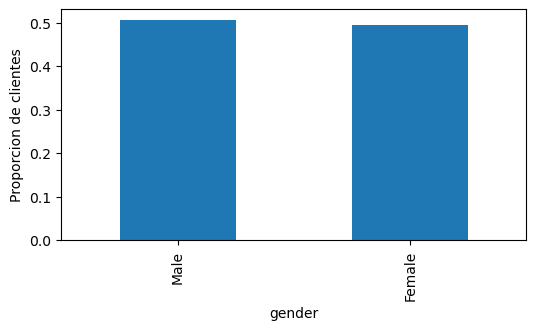

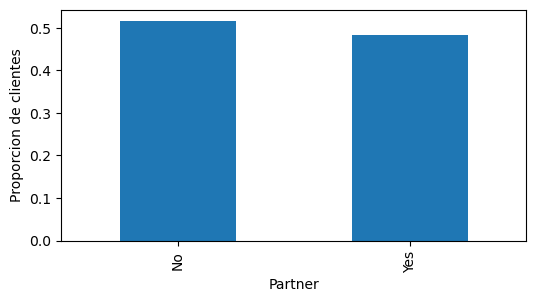

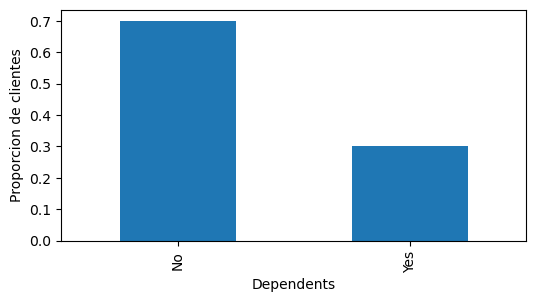

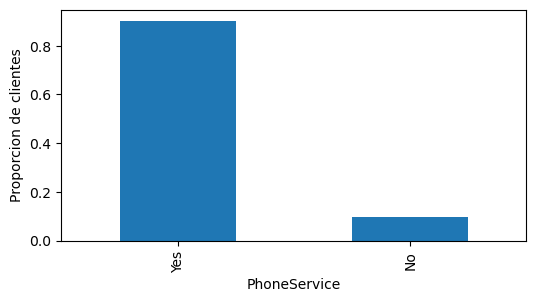

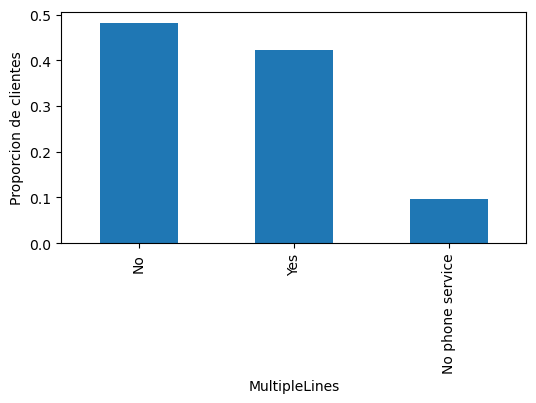

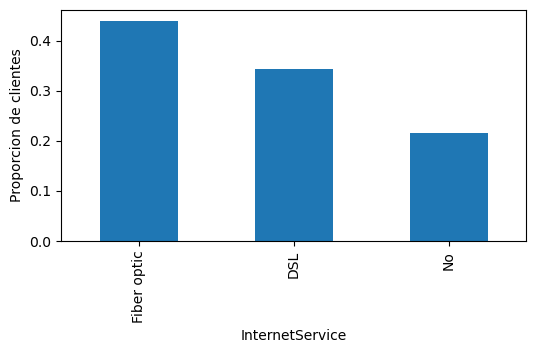

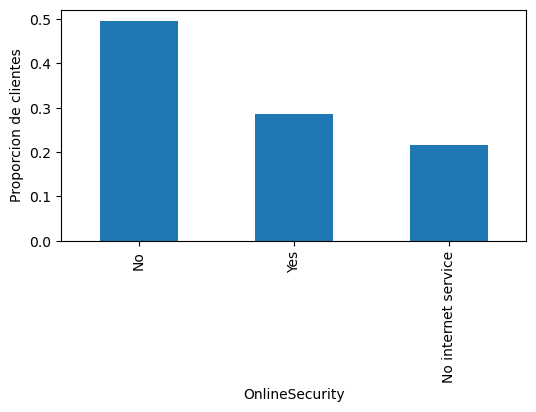

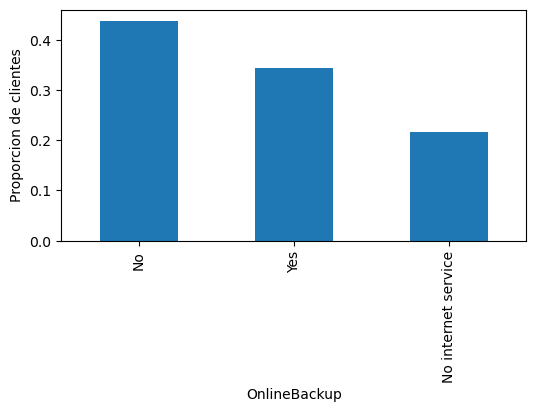

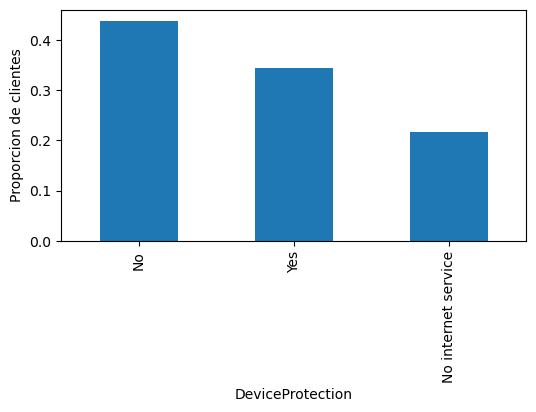

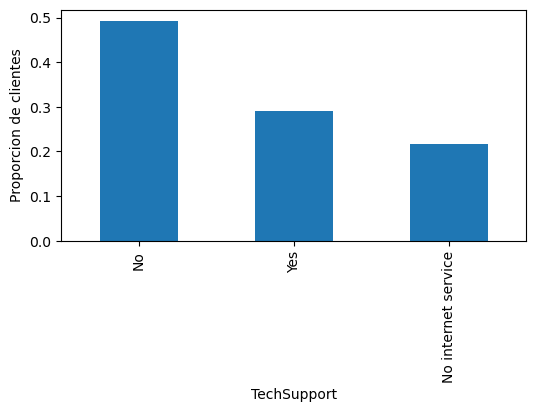

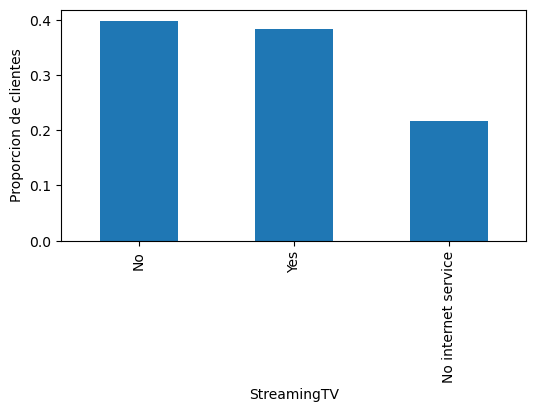

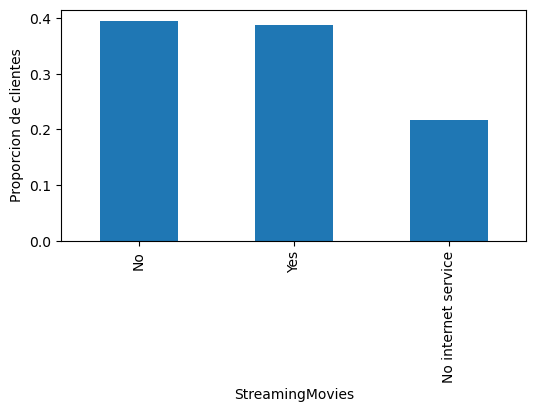

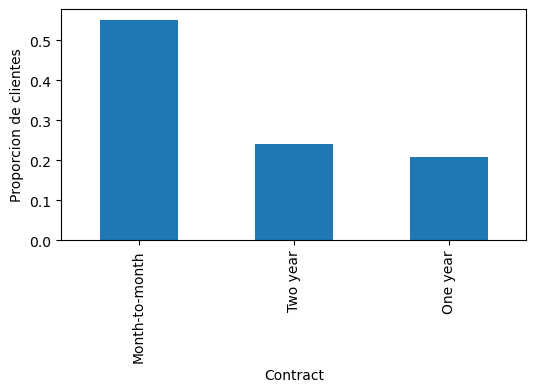

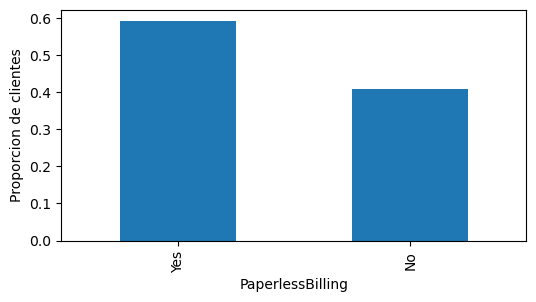

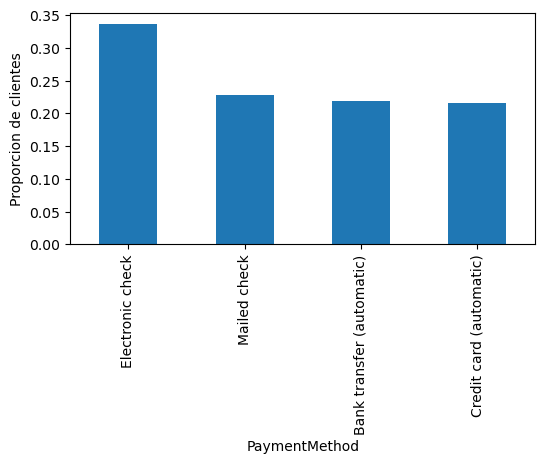

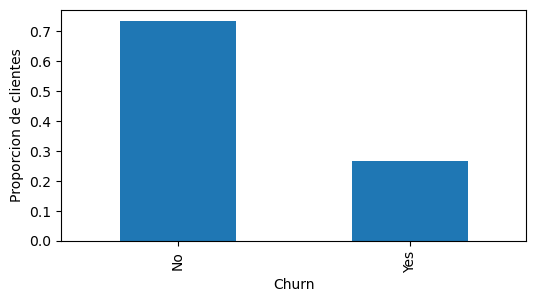

In [46]:
for col in categoricas:
    plt.figure(figsize=(6,3))
    dataset[col].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
    plt.xlabel(col)
    plt.ylabel("Proporcion de clientes")
    plt.show()

### Análisis variables categóricas: Relación con variable a predecir

Usamos la función crosstab de pandas para analizar la frecuencia del churn en cada categoría. Esto lo graficamos, colocando el churn como categoría en cada barra.

Churn        No       Yes
gender                   
Female  0.36192  0.133324
Male    0.37271  0.132046


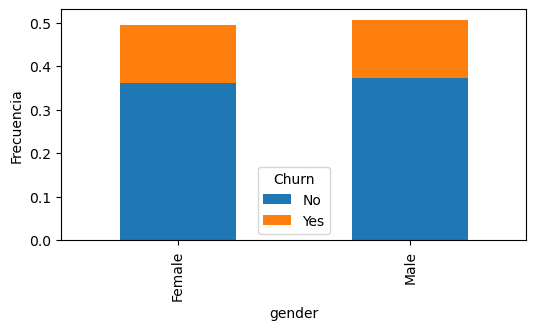

Churn          No       Yes
Partner                    
No       0.346585  0.170382
Yes      0.388045  0.094988


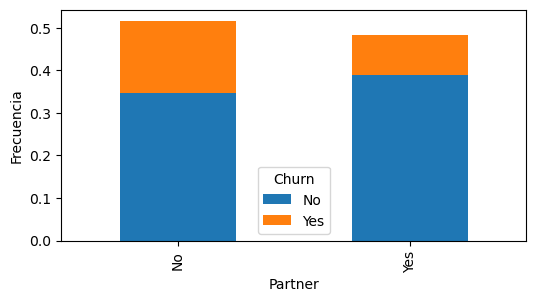

Churn             No       Yes
Dependents                    
No          0.481329  0.219083
Yes         0.253301  0.046287


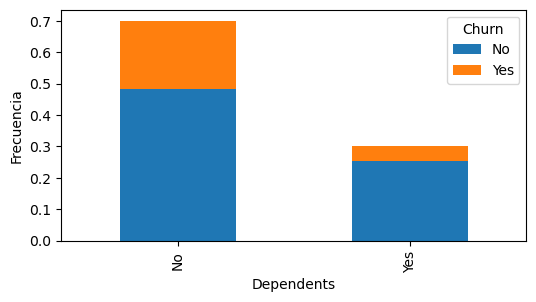

Churn               No       Yes
PhoneService                    
No            0.072696  0.024137
Yes           0.661934  0.241232


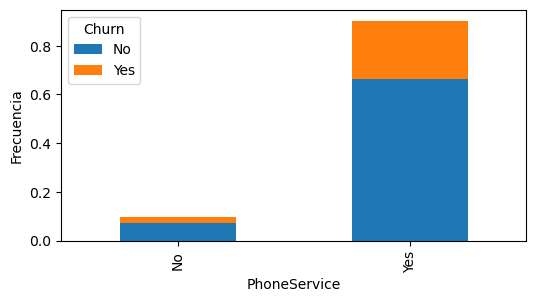

Churn                   No       Yes
MultipleLines                       
No                0.360784  0.120545
No phone service  0.072696  0.024137
Yes               0.301150  0.120687


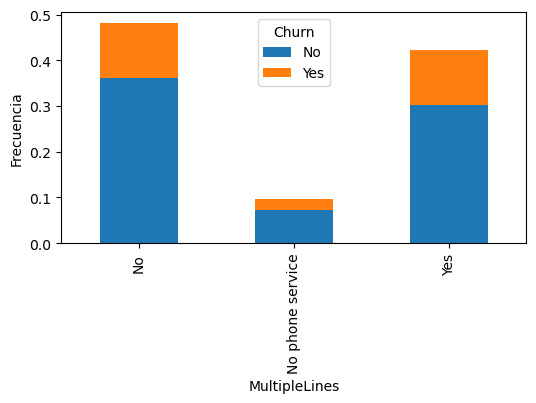

Churn                  No       Yes
InternetService                    
DSL              0.278574  0.065171
Fiber optic      0.255431  0.184154
No               0.200625  0.016044


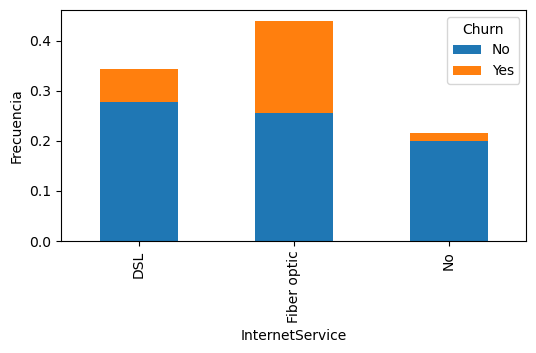

Churn                      No       Yes
OnlineSecurity                         
No                   0.289223  0.207440
No internet service  0.200625  0.016044
Yes                  0.244782  0.041886


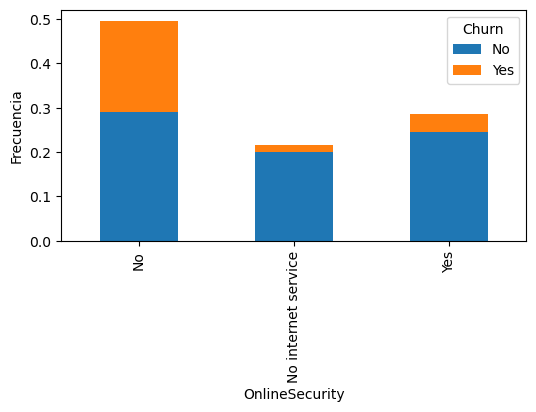

Churn                      No       Yes
OnlineBackup                           
No                   0.263382  0.175067
No internet service  0.200625  0.016044
Yes                  0.270623  0.074258


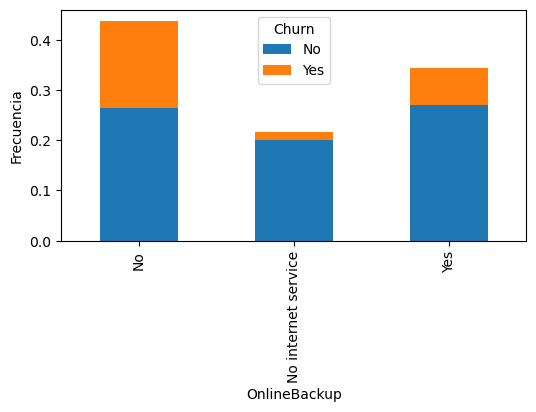

Churn                      No       Yes
DeviceProtection                       
No                   0.267500  0.171944
No internet service  0.200625  0.016044
Yes                  0.266506  0.077382


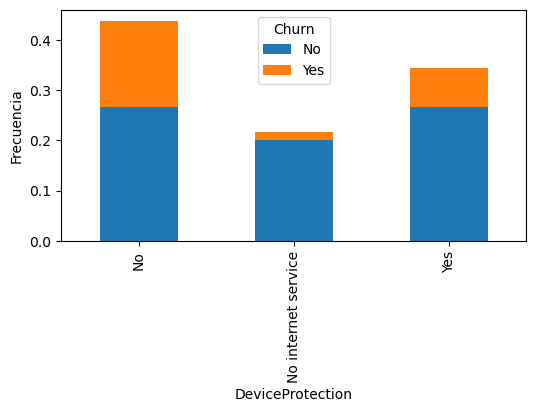

Churn                      No       Yes
TechSupport                            
No                   0.287803  0.205310
No internet service  0.200625  0.016044
Yes                  0.246202  0.044015


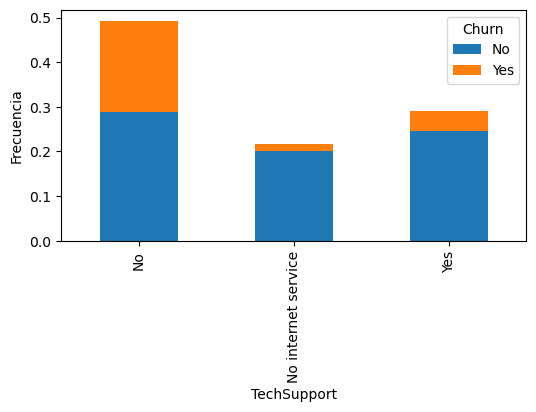

Churn                      No       Yes
StreamingTV                            
No                   0.265228  0.133750
No internet service  0.200625  0.016044
Yes                  0.268778  0.115576


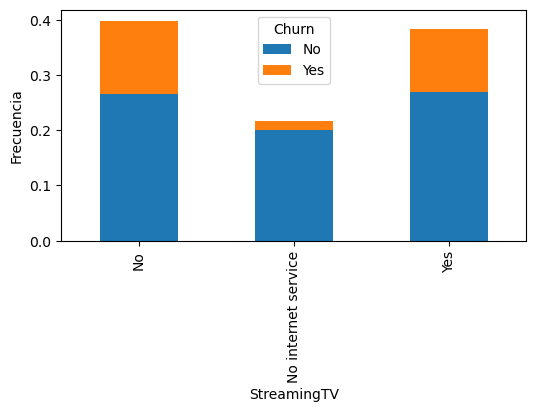

Churn                      No       Yes
StreamingMovies                        
No                   0.262246  0.133182
No internet service  0.200625  0.016044
Yes                  0.271759  0.116144


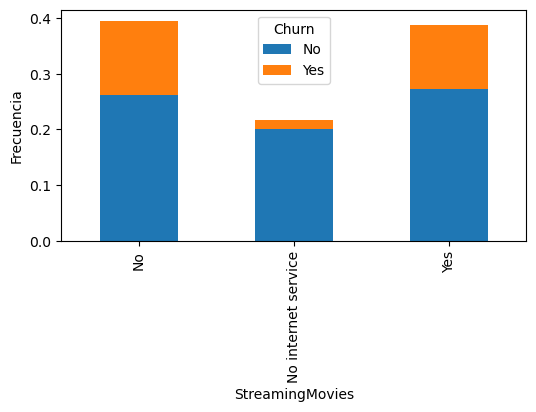

Churn                 No       Yes
Contract                          
Month-to-month  0.315207  0.234985
One year        0.185574  0.023570
Two year        0.233849  0.006815


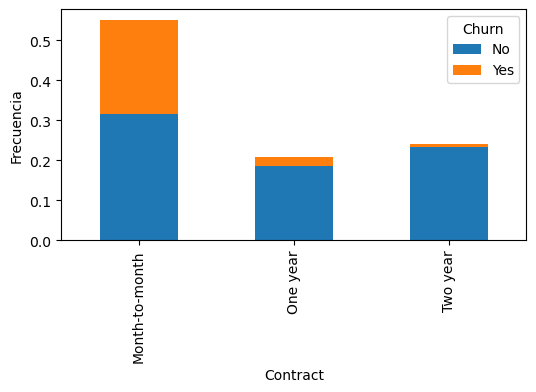

Churn                  No       Yes
PaperlessBilling                   
No                0.34119  0.066591
Yes               0.39344  0.198779


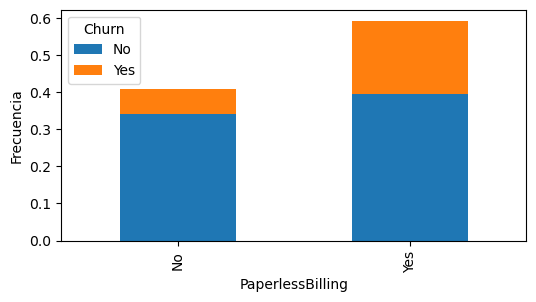

Churn                            No       Yes
PaymentMethod                                
Bank transfer (automatic)  0.182593  0.036632
Credit card (automatic)    0.183161  0.032941
Electronic check           0.183729  0.152066
Mailed check               0.185148  0.043731


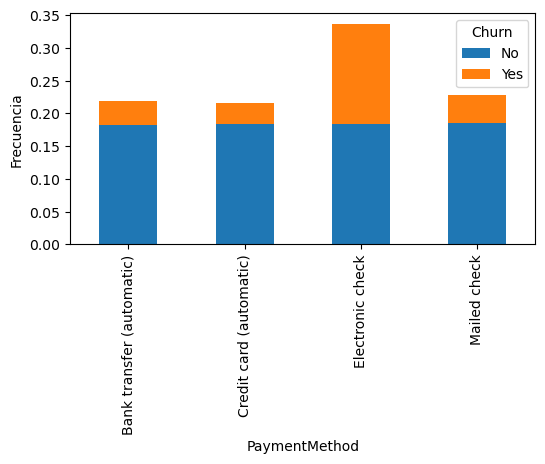

Churn       No      Yes
Churn                  
No     0.73463  0.00000
Yes    0.00000  0.26537


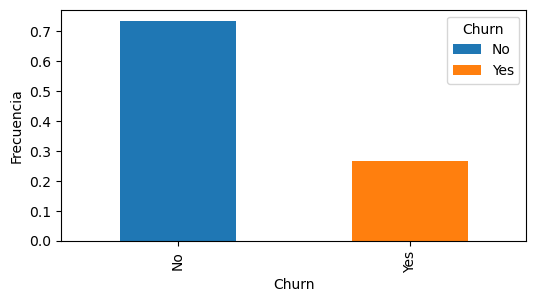

In [54]:
for col in categoricas:
    crosstab_churn = pd.crosstab(dataset[col], dataset['Churn'], normalize=True)
    print(crosstab_churn)
    crosstab_churn.plot(kind='bar', stacked=True, figsize=(6, 3))
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.legend(title="Churn")
    plt.show()

Podemos observar que clientes con ciertas características tienden a ser los que resultan en "churn", por ejemplo, clientes:  
* Sin pareja
* Sin dependientes
* Con servicio telefónico
* Con internet de fibra óptica
* Sin seguridad de internet
* Sin backup online
* Sin seguridad de dispositivo
* Que han llamado a soporte técnico
* Que tienen contrato mes a mes
* Que tienen facturación no impresa
* Que su pago es electrónico

El resto de variables no muestran una tendencia marcada hacia el churn

### Análisis de variables Discretas

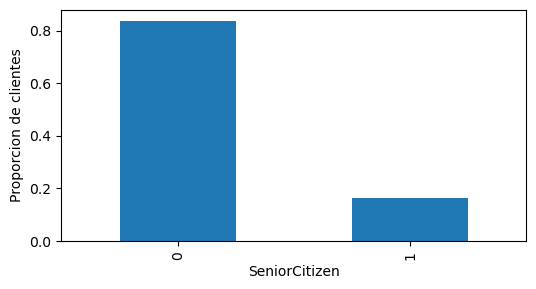

In [55]:
for col in discretas:
    plt.figure(figsize=(6,3))
    dataset[col].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
    plt.xlabel(col)
    plt.ylabel("Proporcion de clientes")
    plt.show()

Churn                No       Yes
SeniorCitizen                    
0              0.640068  0.197785
1              0.094562  0.067585


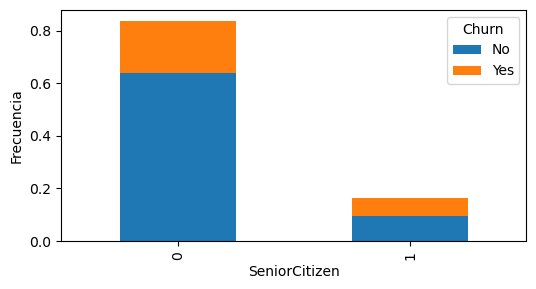

In [56]:
for col in discretas:
    crosstab_churn = pd.crosstab(dataset[col], dataset['Churn'], normalize=True)
    print(crosstab_churn)
    crosstab_churn.plot(kind='bar', stacked=True, figsize=(6, 3))
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.legend(title="Churn")
    plt.show()

Podemos observar que la proporción de ciudadanos mayores que terminan en Churn es mayor.

### Análisis de Variables Continuas - Distribución

Para analizar la variable TotalCharges, filtramos los valores faltantes, que vienen como un espacio (" ") y la convertimos a numérica.

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


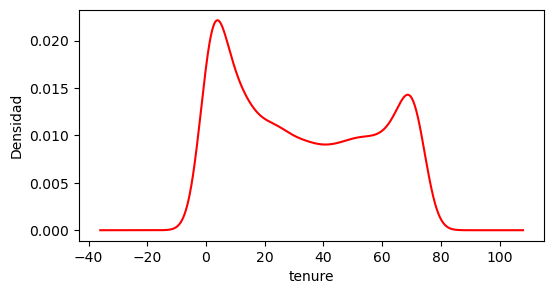

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


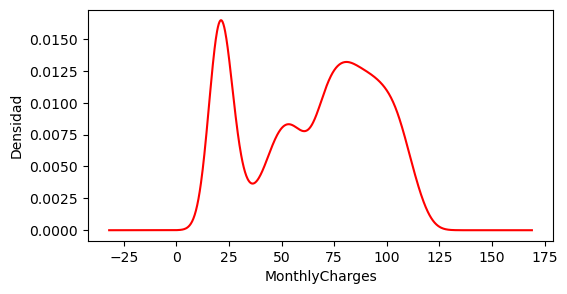

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_9752\435108883.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_filtrado[col] = pd.to_numeric(dataset_filtrado[col])


count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


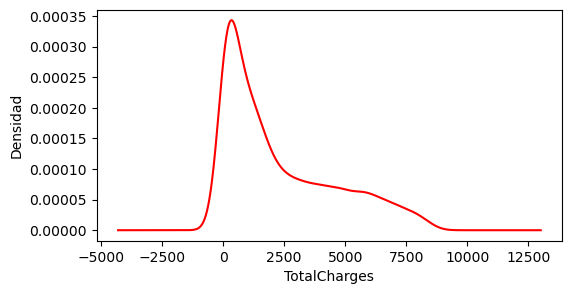

In [61]:
for col in continuas: 
    dataset_filtrado = dataset[dataset[col] != " "]
    dataset_filtrado[col] = pd.to_numeric(dataset_filtrado[col])
    print(dataset_filtrado[col].describe())

    fig = plt.figure(figsize=(6, 3))
    dataset_filtrado[col].plot.density(color="red")
    plt.ylabel("Densidad")
    plt.xlabel(col)
    plt.show()

### Análisis de Variables Continuas - Relación con Variable a Predecir

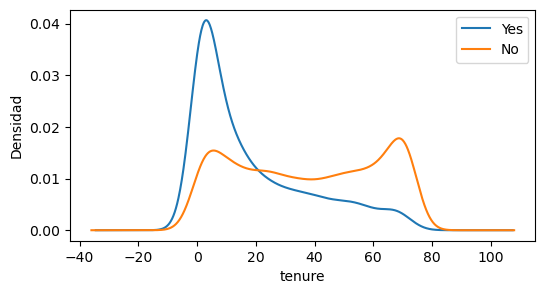

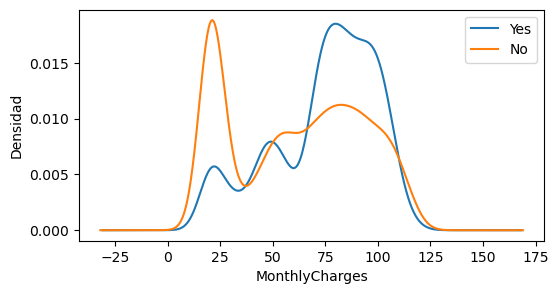

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_9752\386528131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_filtrado[col] = pd.to_numeric(dataset_filtrado[col])


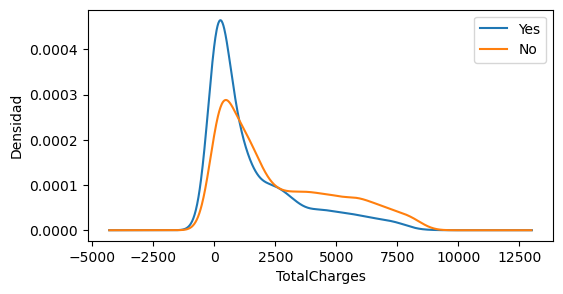

In [63]:
for col in continuas: 
    dataset_filtrado = dataset[dataset[col] != " "]
    dataset_filtrado[col] = pd.to_numeric(dataset_filtrado[col])

    fig = plt.figure(figsize=(6, 3))
    ax = fig.add_subplot(111)

    dataset_filtrado[dataset_filtrado["Churn"] == "Yes"][col].plot(kind="kde", ax=ax, label="Yes")
    dataset_filtrado[dataset_filtrado["Churn"] == "No"][col].plot(kind="kde", ax=ax, label="No")

    ax.legend()
    plt.ylabel("Densidad")
    plt.xlabel(col)
    plt.show()

En este análisis, podemos observar que la cantidad total de cargos (TotalCharges) tiene una distribución similar entre los clientes con y sin churn. 

Los clientes con churn si suelen tener un menor tiempo con la compañía (tenure) y también suelen tener cargos mensuales (MonthlyCharges) más altos.

# 3. Selección de Variables

Después del análisis exploratorio, podemos identificar que ciertas variables no demuestran que logren separar a los clientes que resultan o no en churn. Por ello, no se consideran esenciales de inicio. Estas son:  
* gender: género del cliente
* MultipleLines: si el cliente tiene varias líneas de teléfono
* StreamingTV: si el cliente usa el servicio para ver Tv en streaming
* StreamingMovies: si el cliente usa el servicio para ver películas en streaming  

Las variables que se consideran esenciales para la Clasificación son:
* TotalCharges
* MonthlyCharges
* tenure
* SeniorCitizen
* Partner
* Dependents
* PhoneService
* InternetService
* OnlineSecurity
* OnlineBackup
* DeviceProtection
* TechSupport
* Contract
* PaperlessBilling
* PaymentMethod